<a href="https://colab.research.google.com/github/MarcosMori/power-user-curve/blob/main/cingulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cíngulo:**


**Desafio: Analista de Dados, Business Intelligence ou Ciência de Dados.**


**Problema Proposto:**


O Cíngulo quer entender, de sua base de usuários “premium” (pagantes), qual é o seu comportamento de uso ao longo do mês: quantos usuários (%) utilizam o app 1 vez ao mês, 2 vezes ao mês, ... até 30 (ou 31, ou 28) dias ao mês. Trata-se da chamada “power user curve[0]”, um indicador utilizado por várias empresas para entender o engajamento de seus usuários/clientes.


Os eventos de utilização do app Cíngulo estão mapeados e queremos ter a “power user curve” dos nossos usuários. Para fins deste desafio, foi gerada uma fonte de dados de teste que está disponível no endereço https://static.cingulo.com/bi/user_activities.json


Esse arquivo JSON contém a lista de usuários do app Cíngulo, contendo o ID e uma lista que representa o histórico de utilização do app (activities).
A lista (activities) contém 365 registros, que representa os dias do ano (primeiro item 01/01, último item 31/12). Cada item da lista pode ter o valor “1” ou “0” (1: o usuário utilizou o app; 0: o usuário não utilizou o app).


Para este desafio, queremos ver os gráficos power user curve para os meses:  fevereiro, março e abril.


Requisitos básicos:


- Utilizar Python 3 (qualquer versão do Python 3)
- Instruções de como baixar e rodar o script local
- Criar um repositório no GitHub com o código do teste


Diferenciais:


- Boa documentação/instruções
- Clareza do código
- Ser fácil de rodar
- Estar disponível na internet o resultado do teste (deploy no heroku ou algo do gênero, o
que achar mais fácil)
- Exportar tabela para CSV
- Interpretação dos resultados, em termos de negócio e engajamento do usuário (por escrito, junto com as instruções sobre o projeto)

Ao término do teste, enviar o link do repositório do GitHub do projeto para: daniel@cingulo.com.

**Instrução para rodar**

Para rodar todo o código de uma vez, pressione *CTRL + F9* ou vá até o menu de runtime e selecione "Run all"

In [1]:
#Importando as bibliotecas
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

*Função que irá ler o dataset*

In [2]:
def lerArquivo():
  resultado = requests.get('https://static.cingulo.com/bi/user_activities.json')
  listaClientes = resultado.json()
  return listaClientes

*Função para tratar lista de dados*

A função abaixo irá receber a lista de dados bruta e separar a quantidade de acesso por mês de cada usuário.

**obs. para ganho de performance, comentei os meses que não foram solicitados**

In [3]:
def refinaListaBruta(listaClientes):
  lista = []
  for clientes in listaClientes:
    conexoesDia = clientes.get('activities')
    cliente = {'id': clientes.get('id'),
               #'jan': sum(conexoesDia[0:31]),
               'fev': sum(conexoesDia[31:59]),
               'mar': sum(conexoesDia[59:90]),
               'abr': sum(conexoesDia[90:120]),
               #'may': sum(conexoesDia[120:151]),
               #'jun': sum(conexoesDia[151:181]),
               #'jul': sum(conexoesDia[181:212]),
               #'agu': sum(conexoesDia[212:243]),
               #'sec': sum(conexoesDia[243:273]),
               #'oct': sum(conexoesDia[273:304]),
               #'nov': sum(conexoesDia[304:334]),
               #'dec': sum(conexoesDia[334:])
               }
    lista.append(cliente)
  return lista


*Função para contabalizar quantidade de usuários que acessaram x vezes nos meses de Fevereiro, Março e Abril*

In [32]:
def contabilizaMes(listaClientes):
  listaMes = {
              'fev': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0},
              'mar': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0},
              'abr': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0}
              }
  for mes in listaMes.keys():
    totalMes = 0
    for cliente in listaClientes:
      listaMes[mes][cliente[mes]] = listaMes[mes][cliente[mes]]+ 1
      totalMes = totalMes + 1

    for diasMes in listaMes[mes].keys():
      listaMes[mes][diasMes] = listaMes[mes][diasMes]*100 / totalMes

  return listaMes

*A função abaixo recebe o dicionário de meses, com a quantidade de usuários que acessaram x dias nos meses*

In [53]:
def imprimirGrafico(listaMes):
  width = 1.0
  pos = np.arange(len(listaMes.keys()))

  ax = plt.axes()
  ax.set_xticks(pos + (width / 2))
  ax.set_xticklabels(listaMes.keys())

  plt.bar(listaMes.keys(), listaMes.values(), color = 'g')
  plt.show()

*Abaixo seguem as chamadas para o sistema funcionar corretamente e a impressão dos gráficos

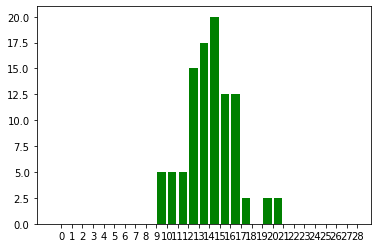

In [54]:
lista = lerArquivo()
dicionarioTratado = refinaListaBruta(lista)
listaMes = contabilizaMes(dicionarioTratado)

imprimirGrafico(listaMes['fev'])

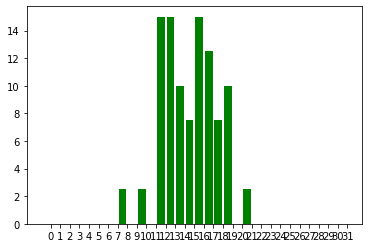

In [55]:
imprimirGrafico(listaMes['mar'])

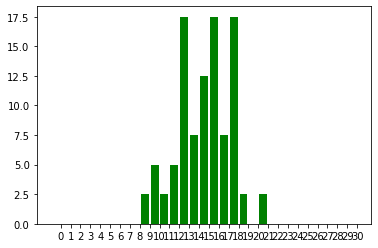

In [56]:
imprimirGrafico(listaMes['abr'])